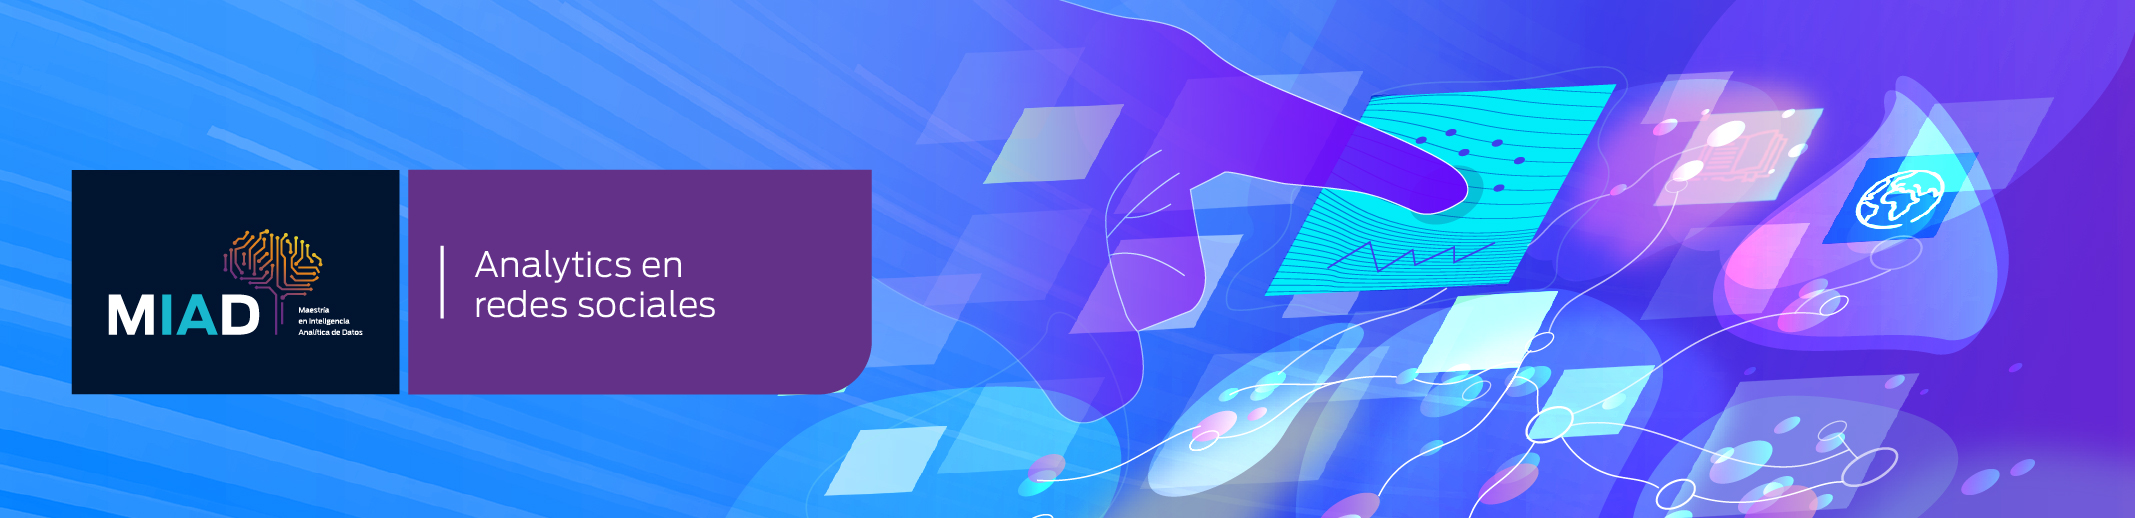

# Tutorial: Implementación de diferentes algoritmos de detección de comunidades

En este notebook usted aprenderá a implementar diferentes algoritmos de detección de comunidades de acuerdo a diferentes propósitos o preguntas a responder con esta detección.  Para esto, utilizaremos las funciones disponibles en la librería ``networkx``.

Este cuaderno está diseñado como guía para que detecte las comunidades dentro de la estructura de una red, utilizando diferentes algoritmos de detección conocidos. Por lo tanto, en el cuaderno encontrará un ejercicio guiado en el que aplicará y visualizará algunos de los algoritmos y podrá practicar con los otros.

#### Expectativas del tutorial

En este tutorial esperamos que usted logre adquirir las siguientes habilidades:
+ Correr diferentes algoritmos de detección de comunidades
+ Identificar las comunidades
+ Medir la calidad de las particiones usando métricas
+ Visualizar las comunidades

#### Tabla de contenido
+ [Inicialización](#iniciar)
+ [Algoritmos para detectar comunidades](#algoritmos)
+ [Ejecución de los diferentes algoritmos y su visualización](#correr)
+ [Métricas para medir la calidad de las particiones](#metricas)

<a id = "iniciar"></a>
### Inicialización
Para empezar, se debe importar las librerías base, con las que usted ya se ha familiarizado.

In [6]:
# Importar las librerias a usar
import networkx as nx
import matplotlib.pyplot as plt

Ahora, utilicemos la librería de NetworkX para generar una red sobre la cual trabajar. En específico, usemos el algoritmo de Newman Watts Strogatz, que toma un número de nodos, el número posible de conexiones de cada nodo y la probabilidad de conexión para generar una red.

Para este ejercicio vamos a generar una red de 50 nodos, con 7 posibles conexiones cada uno, una probabilidad de conexión de 50% y, de forma opcional, vamos a definir la semilla de generación aleatoria número 5 para mantener consistencia en los resultados.

In [7]:
# Generar la red bajo el algoritmo de Newman Watts Strogatz
G=nx.newman_watts_strogatz_graph(n=50, k= 7, p=0.5, seed=5)

Una vez construida la red vamos a visualizarla.

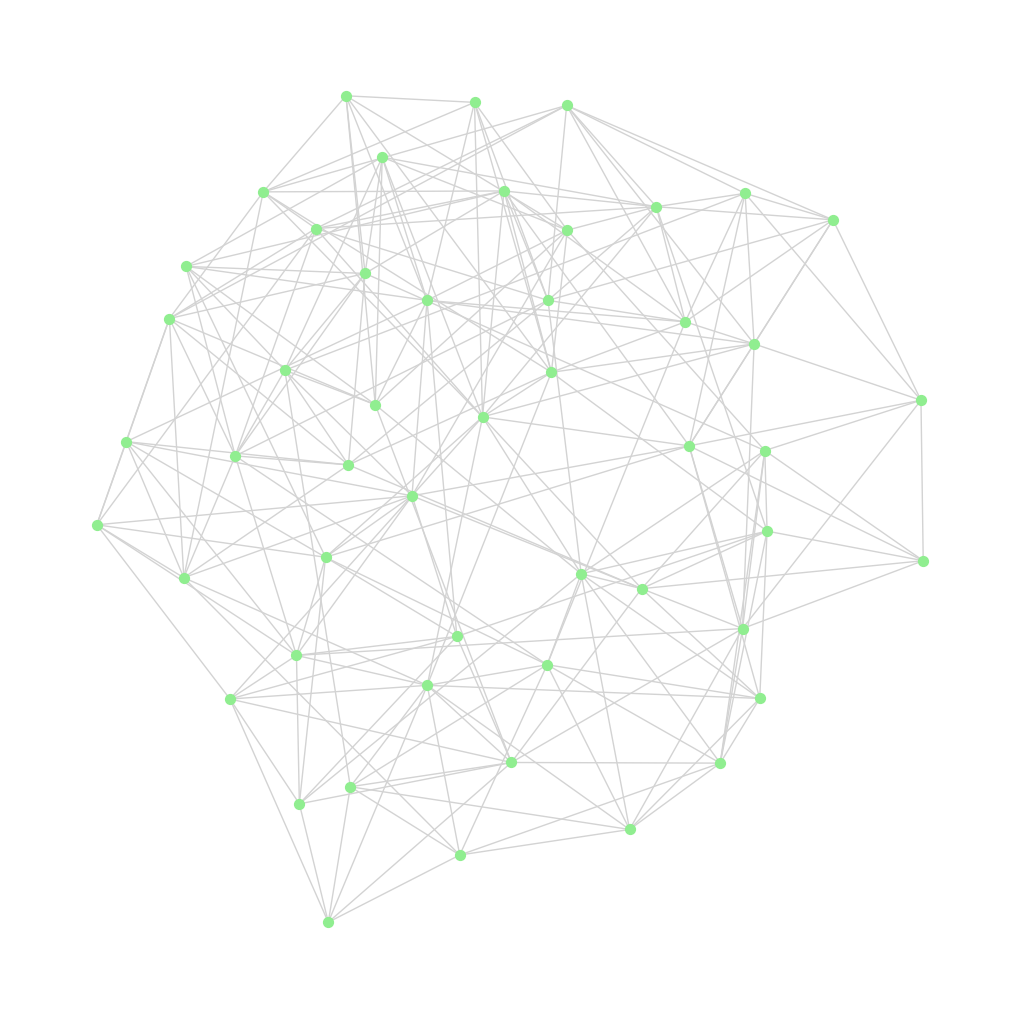

In [8]:
# Dimensionar la gráfica
fig=plt.figure(figsize=(10,10))

# Generar la gráfica
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')

<a id = "algoritmos"></a>
### Algoritmos para detectar comunidades
A parte del algoritmo de Louvain, se han desarrollado diferentes algoritmos por investigadores apuntando a diferentes aspectos de la estructura de la red para identificar las comunidades. Los métodos de detección se pueden agrupar de manera general en métodos aglomerativos o divisivos:

+ Métodos aglomerativos: de manera general, estos métodos empiezan tomando en cuenta solo los nodos presentes en la red. Los algoritmos avanzan agregando los arcos uno a uno al grafo. Se prioriza la asignación de arcos fuertes sobre arcos débiles. La forma en que se le da peso a los arcos va a cambiar en función del algoritmo utilizado. La idea es agregar los arcos mínimos necesarios para que se vean la estructuras fuertemente conectadas que se van a utilizar como comunidades.

+ Métodos divisivos: de manera general, estos métodos empiezan con el grafo completo (tanto en arcos como nodos). Los algoritmos avanzan removiendo arcos, dando prioridad a los arcos fuertes sobre los débiles. Después de cada retirada se recalculan los pesos de los arcos. La idea es remover los arcos mínimos necesarios para que se vean la estructuras fuertemente conectadas que se van a utilizar como comunidades.

+ Métodos basados en métricas: de manera general, estos métodos realizan asignaciones aleatorias de los nodos a un número específico de comunidades. El algoritmo itera asignando a los nodos a otras comunidades que maximicen o minimicen (dependiendo del sentido de la métrica) la métrica predeterminada. El algoritmo termina cuando encuentra el número óptimo de comunidades que maximizan o minimizan la métrica.

A continuación presentaremos brevemente algunos de los algoritmos existentes más frecuentemente utilizados:

+ Algoritmos vía modularidad
+ Girvan-Newman
+ Fluid communities
+ Label propagation
+ Clique Percolation
+ Kernighan-Lin

**Algoritmos vía modularidad**

Los algoritmos vía modularidad buscan maximizar la métrica de modularidad para la partición de las comunidades.

**Girvan-Newman**

Este algoritmo detecta las comunidades al remover arcos dentro de la red. La idea del algoritmo es detectar los componentes fuertemente conectados de la red subyacente y utilizarlos como comunidades. Para esto, se calcula la centralidad de cada arco utilizando una variación del *betweenness*. Esta métrica se llama el **edge betweenness**  se define como el número de caminos cortos entre todos los pares de nodos que lo utlizan como ruta.

**Fluid communities**

Este algoritmo detecta las comunidades bajo la idea de la interacción de fluidos en un ambiente, donde los fluidos se expanden y contraen unos con otros. El algoritmo inicia de la sigueinte manera. Primero se inicializa cada una de las k comunidades iniciales en un vértice aleatorio del grafo. A continuación, el algoritmo itera sobre todos los vértices en un orden aleatorio, actualizando la comunidad de cada vértice en función de su propia comunidad y de las comunidades de sus vecinos. Este proceso se realiza varias veces hasta la convergencia. 

**Label propagation**

Este algoritmo detecta las comunidad utilizando métodos semi-supervisados de aprendizaje automático que asignan *labels* a los nodo sin *labels* hasta que todos quedan con uno. Después de inicializar cada nodo con una etiqueta única, el algoritmo establece repetidamente la etiqueta de un nodo para que sea la etiqueta que aparece con más frecuencia entre los vecinos de ese nodo. El algoritmo se detiene cuando cada nodo tiene la etiqueta que aparece con más frecuencia entre sus vecinos. El algoritmo es asíncrono porque cada nodo se actualiza sin esperar las actualizaciones de los demás nodos.

**Clique Percolation**

Este algoritmo detecta las comunidades utilizando *k-clique* comunidades utilizando el método de percolación. Este método puede ser generalizado mediante las posibles cantidades de traslape entre los diferentes k-cliques. Contando cada solapamiento entre las diferentes comunidades se puede considerar un nuevo gráfico de k-cliques, donde cada k-clique está representado en el gráfico original por un vértice en el gráfico nuevo. Se puede utilizar cualquier método de detección de comunidad para identificar los clúster en el gráfico original a través de la estructura k-cliques dicha antes.

**Kernighan-Lin**

Este algoritmo detecta las comunidades en la red al intercambiar iterativamente pares de nodos para reducir el corte de aristas entre conjuntos. Los pares se eligen según una forma modificada de Kernighan-Lin, que mueve los nodos individualmente, alternando entre los lados para mantener la bisección equilibrada.

Las descripciones se basan en: https://networkx.org/documentation/stable/reference/algorithms/community.html. En la descripción de la librería sobre comunidades puede encontrar mayor información.

<a id = "correr"></a>
### Ejecución de los diferentes algoritmos y su visualización
Vamos a utilizar las funciones disponibles en la librería **networkx** para la detección de comunidades.

Vamos a empezar con la más básica, este algoritmo detecta las comunidades maximizando la modularidad. Para esto usaremos la función ``greedy_modularity_communities(G[, weight, …])``. Esta función recibe por parámetro el grafo ``g`` y el peso que se va a usar para los arcos (por defecto es 1).

In [27]:
#Correr el algoritmo
from networkx.algorithms.community import greedy_modularity_communities
partitions = greedy_modularity_communities(G)

In [28]:
partitions

[frozenset({2,
            3,
            4,
            5,
            6,
            7,
            8,
            9,
            10,
            11,
            12,
            13,
            14,
            15,
            16,
            17,
            18,
            19,
            20,
            21,
            22}),
 frozenset({0, 1, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}),
 frozenset({23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34})]

Como pueden ver, el resultado es una lista con ``n`` listas, donde ``n`` corresponde al número de comunidades detectadas. En este ejemplo podemos ver que esta lista tiene 3 listas dentro, por lo que el número óptimo de comunidades fue 3. Adentro de cada lista, aparecen los ``ids`` de los nodos.

Ahora lo que vamos a hacer es guardar de manera ordenada la comunidad de cada nodo en un arreglo para utilizarlo en la visualización

In [7]:
#Guardar la lista de nodos para recorrerla
nodos = list(G.nodes())
#nodos
values = [0]*len(nodos)
#values
for i in nodos:
    for j in range(0,len(partitions)):
        if(i in list(partitions[j])):
            values[i] = j+1
            
values

[2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

Ahora vamos a graficar las comunidades para verlas distribuidas en el grafo.

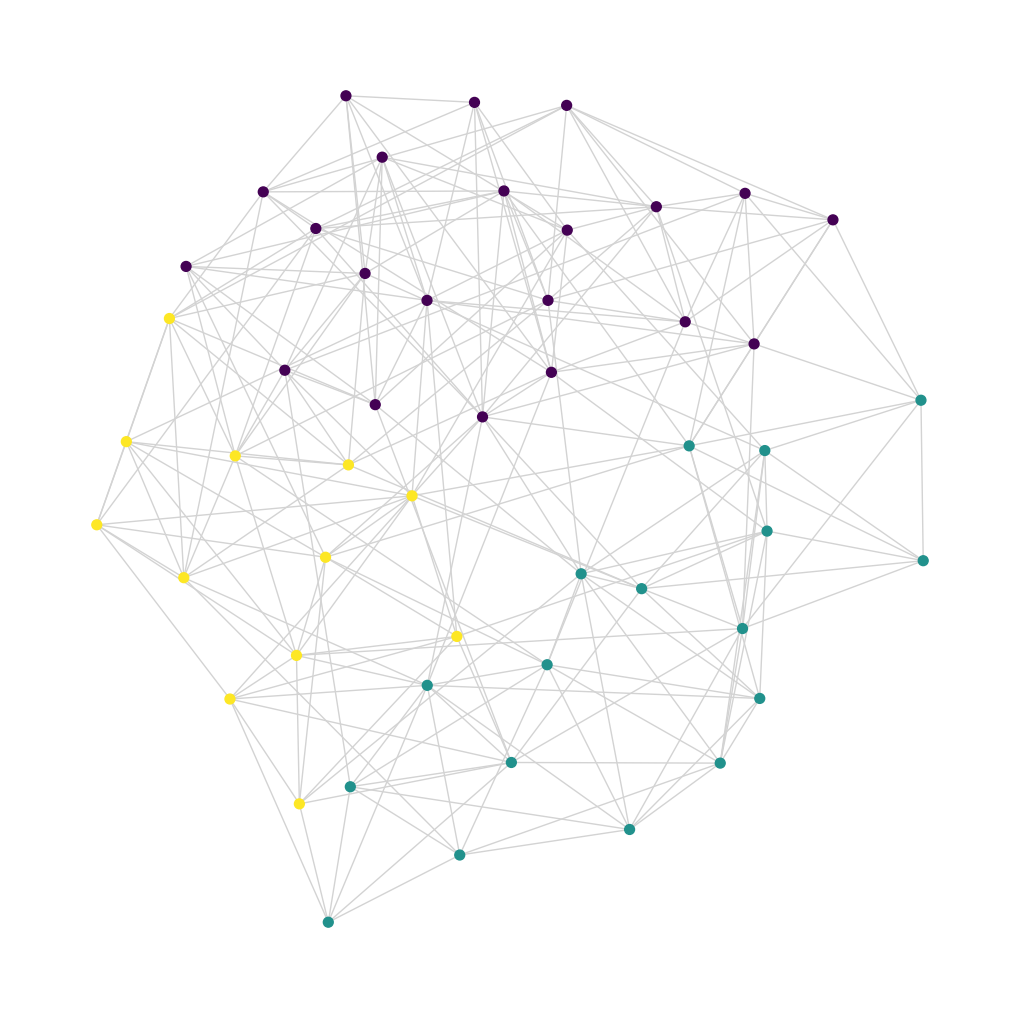

In [8]:
# Dimensionar gráfica
plt.figure(figsize=(10,10))

# Graficar la red con los colores de cada nodo representando las comunidades
nx.draw_kamada_kawai(G,node_color = values, node_size=50, edge_color='lightgray')

Vamos a seguir con el algoritmo de **Girvan-Newman**. Para este algoritmo usaremos la función ``girvan_newman(G)``. Esta función recibe por parámetro el grafo ``g`` y el peso que se va a usar para los arcos (por defecto es 1).

In [9]:
#Correr el algoritmo
from networkx.algorithms.community import girvan_newman
partitions = girvan_newman(G)

In [10]:
#Extraer las comunidades
lista = tuple(sorted(c) for c in next(partitions))

Como pueden ver, el resultado es una lista con ``n`` listas, donde ``n`` corresponde al número de comunidades detectadas. En este ejemplo podemos ver que esta lista tiene 5 listas dentro, por lo que el número óptimo de comunidades fue 5. Adentro de cada lista, aparecen los ``ids`` de los nodos.

Ahora lo que vamos a hacer es guardar de manera ordenada la comunidad de cada nodo en un arreglo para utilizarlo en la visualización

In [11]:
#Guardar la lista de nodos para recorrerla
nodos = list(G.nodes())
#nodos
values = [0]*len(nodos)
#values
for i in nodos:
    for j in range(0,len(lista)):
        if(i in lista[j]):
            values[i] = j+1            
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

Al igual que con el anterior algoritmo, vamos a graficar las comunidades para verlas distribuidas en el grafo.

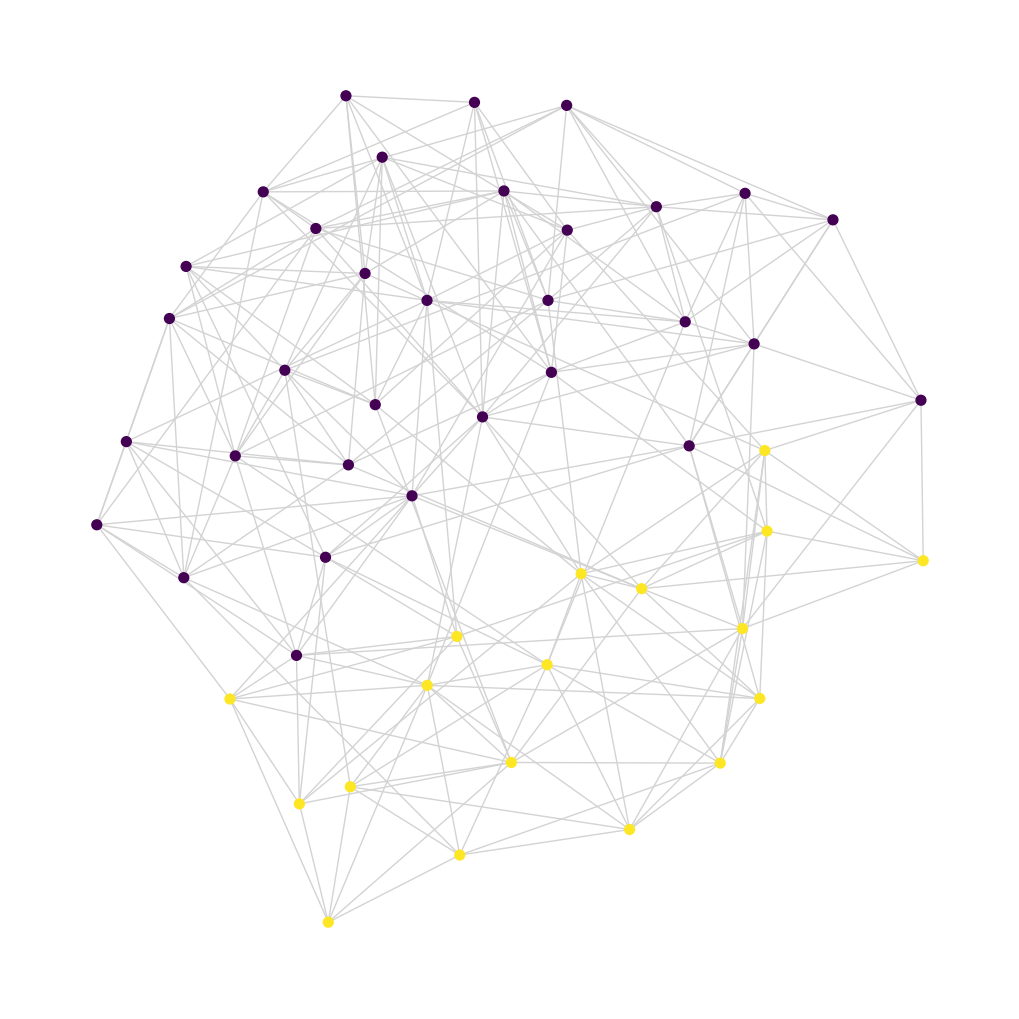

In [12]:
# Dimensionar gráfica
plt.figure(figsize=(10,10))

# Graficar la red con los colores de cada nodo representando las comunidades
nx.draw_kamada_kawai(G,node_color = values, node_size=50, edge_color='lightgray')

Vamos a seguir con el algoritmo de **Fluid communities**. Para este algoritmo usaremos la función ``asyn_fluidc(G, k, max_iter=100, seed=None)``. Esta función recibe por parámetro el grafo ``g``, el número ``k`` de comunidades a detectar y el número máximo de iteraciones ``max_iter`` a tener en el atributo. Esta función no está disponible para grafos con pesos.

In [13]:
#Correr el algoritmo
from networkx.algorithms.community import asyn_fluidc
partitions = asyn_fluidc(G,4)

In [14]:
#Extraer las comunidades
lista = list(partitions)
lista

[{12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26},
 {27, 28, 29, 30, 31, 32, 33, 34, 35},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 48, 49},
 {36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47}]

Como pueden ver, el resultado es una lista con ``n`` listas, donde ``n`` corresponde al número de comunidades definidas inicialmente. En este ejemplo podemos ver que esta lista tiene 5 listas dentro, por lo que el número óptimo de comunidades fue 5. Adentro de cada lista, aparecen los ``ids`` de los nodos.

Ahora lo que vamos a hacer es guardar de manera ordenada la comunidad de cada nodo en un arreglo para utilizarlo en la visualización

In [15]:
#Guardar la lista de nodos para recorrerla
nodos = list(G.nodes())
#nodos
values = [0]*len(nodos)
#values
for i in nodos:
    for j in range(0,len(lista)):
        if(i in lista[j]):
            values[i] = j+1            
values

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3]

Al igual que con el anterior algoritmo, vamos a graficar las comunidades para verlas distribuidas en el grafo.

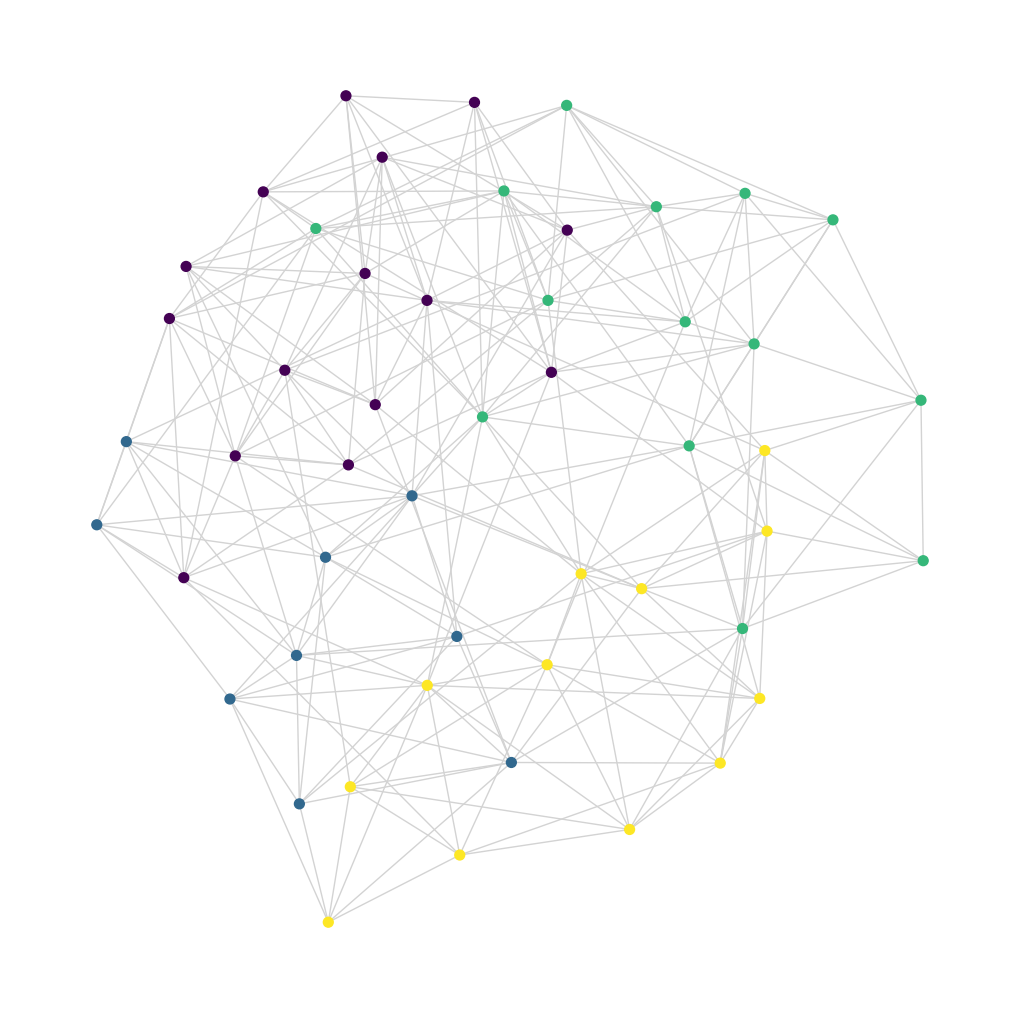

In [16]:
# Dimensionar gráfica
plt.figure(figsize=(10,10))

# Graficar la red con los colores de cada nodo representando las comunidades
nx.draw_kamada_kawai(G,node_color = values, node_size=50, edge_color='lightgray')

Las demás funciones son las siguientes, la idea es que se puedan explorar estas funciones para ver los diferentes algoritmos presentes:

+ El algoritmo de **Label propagation** utiliza la función ``label_propagation_communities(G)``. Esta función recibe por parámetro el grafo ``g``

+ El algoritmo de **Clique percolation** utiliza la función ``k_clique_communities(G, k, cliques=None)``. Esta función recibe por parámetro el grafo ``g``, el número ``k`` menor tamaño de cliques para detectar las comunidades.

+ El algoritmo de **Kernighan-Lin** utiliza la función ``kernighan_lin_bisection(G, partition=None, max_iter=10, weight='weight', seed=None)``. Esta función recibe por parámetro el grafo ``g`` y otros parámetros que vienen definidos de manera automática.

Prueba a aplicar los algoritmos al grafo propuesto y observa cómo cambia la visualización de las comunidades cuando se cambia el algoritmo de detección.

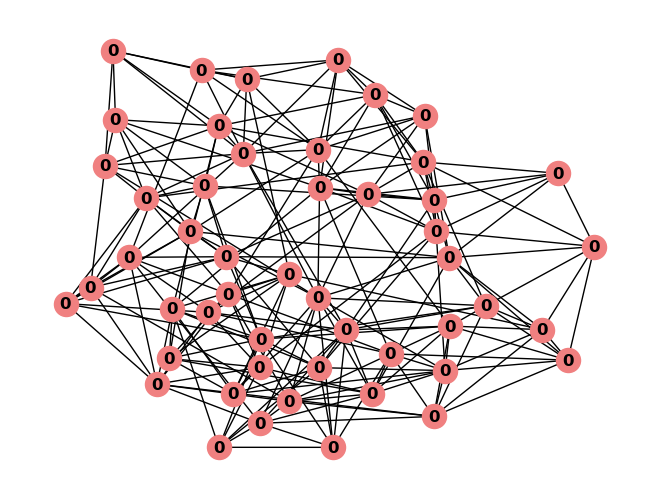

{0: array([0.93074862, 0.07856146]),
 1: array([0.46926996, 0.02599066]),
 2: array([ 0.58500347, -0.20002308]),
 3: array([ 0.7651982 , -0.31260601]),
 4: array([ 0.84600357, -0.45582272]),
 5: array([ 0.47210324, -0.29553975]),
 6: array([ 0.41945648, -0.72065848]),
 7: array([ 0.28238205, -0.4263146 ]),
 8: array([ 0.45570716, -0.50512293]),
 9: array([-0.03916352, -0.6500037 ]),
 10: array([ 0.22356592, -0.61438374]),
 11: array([ 0.0512957 , -0.16266188]),
 12: array([-0.13289969, -0.75293588]),
 13: array([ 0.14082736, -0.31392855]),
 14: array([ 0.1000349 , -0.86616544]),
 15: array([-0.2632266 , -0.86598744]),
 16: array([ 0.05567301, -0.49130638]),
 17: array([-0.12937176, -0.35693796]),
 18: array([-0.41096305, -0.21476568]),
 19: array([-0.21781887, -0.61431402]),
 20: array([-0.42134781, -0.44797927]),
 21: array([-0.0389468 , -0.05267002]),
 22: array([-0.13419223, -0.48935209]),
 23: array([-0.2333295 , -0.14502555]),
 24: array([-0.29672174, -0.23109918]),
 25: array([-0

In [23]:
#Espacio para utilizar los otros métodos de detección de comunidades
from networkx.algorithms.community import label_propagation

#partitions = nx.algorithms.node_classification.label_propagation.label_propagation_communities(G)

partitions = label_propagation.label_propagation_communities(G)

partitions

final_labels = {node: label for label, nodes in enumerate(partitions) for node in nodes}
final_labels


# Visualizar el grafo con las etiquetas finales
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightcoral', labels=final_labels)
plt.show()




<a id = "metricas"></a>
### Métricas para medir la calidad de las particiones

Hay dos métricas comúnmente utilizadas para mirar la calidad de las particiones realizadas a través de los diferentes algoritmos. Entre estas se encuentran la **cobertura**, el **rendimiento** y la **modularidad**.

La **cobertura** de una partición es la relación entre el número de aristas intracomunitarias y el número total de aristas del gráfico.

El **rendimiento** de una partición es el número de aristas intracomunitarias más las no aristas intercomunitarias dividido por el número total de aristas potenciales.

Este algoritmo tiene una complejidad $O*(C^2 + L)$ en la que ``C`` es el número de comunidades y ``L`` es el número de enlaces.



In [16]:
#Retomemos las particiones encontradas con el algoritmo de máxima modularidad
from networkx.algorithms.community import greedy_modularity_communities
partitions = greedy_modularity_communities(G)

Para calcular la cobertura utilizamos la función ``coverage(G, partition)`` y ``performance(G, partition)``, en donde ``G`` corresponde al grafo y ``partition`` corresponde a una secuencia de enteros que representa la partición de los nodos. El resultado de la función es una tupla con los valores para cobertura y rendimiento. Esta métrica solo se puede calcular para redes dirigidas y no dirigidas.

In [17]:
#Calcular la cobertura
import networkx.algorithms.community as nx_comm
#nx_comm.coverage(G,partitions)

nx_comm.partition_quality(G,partitions)

(0.7180616740088106, 0.7444897959183674)

In [ ]:
#Calcular la cobertura
import networkx.algorithms.community as nx_comm
nx_comm.performance(G,partitions)

La **modularidad** es una medida que mide la fuerza de la división de una red en comunidades. Las redes con alta modularidad tienen conexiones densas entre los nodos dentro de los módulos, pero conexiones escasas entre los nodos de diferentes módulos. Para calcular la modularidad se utiliza la función ``modularity(G, communities, weight='weight', resolution=1)``, en donde ``G`` corresponde al grafo y ``communities`` corresponde a un conjunto de listas representando las particiones.

In [18]:
#Retomemos las particiones encontradas con el algoritmo de fluidos
from networkx.algorithms.community import asyn_fluidc
partitions = asyn_fluidc(G,4)
lista = list(partitions)

In [19]:
nx_comm.modularity(G,lista)

0.3998428069630693